In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [105]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load
import numpy as np

tf.random.set_seed(42)

output_dir = "myLearningData/savefig/4line/LargeData/fine"  # 저장할 폴더 이름
if not os.path.exists(output_dir): # 폴더가 없는 경우 폴더를 생성합니다.
    os.makedirs(output_dir)
data = '240321_2151_4line_I2C'
datanickname = '_CNN_R10_Force33'
dataname = data+datanickname
filename = 'myData/'+data+'.csv'
SDreal = pd.read_csv(filename)
SDreal=SDreal.iloc[:,:52]
SDreal.describe()

Sx00           Sx01           Sx02           Sx03  \
count  146880.000000  146880.000000  146880.000000  146880.000000   
mean        1.279253      -0.346057      -3.837517       0.805476   
std         0.749442       0.759199       0.758682       0.710447   
min        -8.900000     -10.600000     -13.800000      -7.400000   
25%         0.900000      -0.800000      -4.300000       0.400000   
50%         1.300000      -0.300000      -3.800000       0.800000   
75%         1.700000       0.100000      -3.400000       1.200000   
max         5.000000       4.000000       0.800000       4.000000   

                Sx04           Sx05           Sx06           Sx07  \
count  146880.000000  146880.000000  146880.000000  146880.000000   
mean        0.966309      -1.541655       0.330996       2.831755   
std         0.577707       0.635311       0.572192       0.804990   
min        -7.700000     -10.500000      -6.300000      -7.200000   
25%         0.700000      -1.900000       0.000000       2.400000   
50%         1.000000      -1.500000       0.300000       2.900000   
75%         1.300000      -1.200000       0.700000       3.300000   
max         5.800000       1.700000       5.900000       7.000000   

                Sx08           Sx09  ...           Sx42           Sx43  \
count  146880.000000  146880.000000  ...  146880.000000  146880.000000   
mean        0.194075      -2.327116  ...      -1.185481       0.978064   
std         0.824762       0.816964  ...       0.778943       0.739160   
min       -12.300000     -14.200000  ...     -13.000000     -12.500000   
25%        -0.200000      -2.700000  ...      -1.600000       0.600000   
50%         0.300000      -2.300000  ...      -1.200000       1.000000   
75%         0.700000      -1.900000  ...      -0.700000       1.400000   
max         4.500000       1.800000  ...       3.000000       6.100000   

                Sx44           Sx45           Sx46           Sx47  \
count  146880.000000  146880.000000  146880.000000  146880.000000   
mean        1.907874       0.846228      -1.412229       1.225056   
std         0.907863       0.882883       0.785372       0.988020   
min       -13.100000     -14.700000     -14.900000     -13.500000   
25%         1.600000       0.600000      -1.700000       0.900000   
50%         2.000000       0.900000      -1.400000       1.300000   
75%         2.400000       1.300000      -1.000000       1.800000   
max         4.400000       5.300000       2.600000       4.300000   

               Force              z          theta              r  
count  146880.000000  146880.000000  146880.000000  146880.000000  
mean        1.663077      80.000000     177.500000       7.000000  
std         1.304994      39.191969     103.913378       3.415662  
min        -0.039400      16.000000       0.000000       2.000000  
25%         0.518100      48.000000      88.750000       4.000000  
50%         1.409100      80.000000     177.500000       7.000000  
75%         2.618425     112.000000     266.250000      10.000000  
max         5.219000     144.000000     355.000000      12.000000  

[8 rows x 52 columns]

In [106]:
# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]
SDreal = SDreal[~((SDreal <= 0) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[~((SDreal <= SDreal['Force'].max()/5) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 1]
SDreal = SDreal[SDreal["r"] <= 10]

#SDreal = SDreal[SDreal["z"] <= 80]
#SDreal = SDreal[SDreal["z"] <= 120]




import numpy as np

toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()

Sx00          Sx01          Sx02          Sx03          Sx04  \
count  65269.000000  65269.000000  65269.000000  65269.000000  65269.000000   
mean       1.290489     -0.377413     -3.853056      0.835813      1.002579   
std        0.687468      0.697428      0.646114      0.643206      0.505094   
min       -6.800000     -8.700000    -11.500000     -5.500000     -5.600000   
25%        0.900000     -0.800000     -4.200000      0.400000      0.700000   
50%        1.300000     -0.400000     -3.800000      0.900000      1.000000   
75%        1.700000      0.100000     -3.400000      1.200000      1.300000   
max        4.400000      3.600000      0.000000      4.000000      4.900000   

               Sx05          Sx06          Sx07          Sx08          Sx09  \
count  65269.000000  65269.000000  65269.000000  65269.000000  65269.000000   
mean      -1.545472      0.408611      2.904912      0.158806     -2.352873   
std        0.572449      0.527000      0.728146      0.759076      0.763944   
min       -8.300000     -3.600000     -3.800000     -9.300000    -11.200000   
25%       -1.900000      0.100000      2.500000     -0.200000     -2.700000   
50%       -1.500000      0.400000      2.900000      0.200000     -2.300000   
75%       -1.200000      0.800000      3.400000      0.600000     -1.900000   
max        1.300000      4.300000      7.000000      3.200000      0.500000   

       ...          Sx44          Sx45          Sx46          Sx47  \
count  ...  65269.000000  65269.000000  65269.000000  65269.000000   
mean   ...      1.904685      0.813579     -1.429570      1.187775   
std    ...      0.884762      0.840645      0.743311      0.945504   
min    ...    -10.500000    -11.800000    -12.400000    -10.500000   
25%    ...      1.600000      0.500000     -1.800000      0.800000   
50%    ...      2.000000      0.900000     -1.400000      1.300000   
75%    ...      2.400000      1.300000     -1.000000      1.700000   
max    ...      4.200000      5.300000      2.600000      4.300000   

              Force             z         theta             r           cos  \
count  65269.000000  65269.000000  65269.000000  65269.000000  65269.000000   
mean       2.221413     76.810860    184.054988      7.277728     -0.144255   
std        0.807405     30.135592     94.220721      2.339650      0.687852   
min        1.043900     16.000000      0.000000      2.000000     -1.000000   
25%        1.548100     56.000000    110.000000      6.000000     -0.819152   
50%        2.115600     80.000000    190.000000      8.000000     -0.258819   
75%        2.817800    104.000000    260.000000     10.000000      0.500000   
max        4.344400    144.000000    355.000000     10.000000      1.000000   

                sin  
count  65269.000000  
mean      -0.053257  
std        0.709386  
min       -1.000000  
25%       -0.766044  
50%       -0.087156  
75%        0.642788  
max        1.000000  

[8 rows x 54 columns]

In [107]:
NUMSEN = 48
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :NUMSEN].mean().values
std_values = SDreal.iloc[:, :NUMSEN].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

min_max_F = [round(SDreal.iloc[:, NUMSEN].min(), 2), round(SDreal.iloc[:, NUMSEN].max(), 2)]
min_max_Z = [round(SDreal.iloc[:, NUMSEN+1].min(), 2), round(SDreal.iloc[:, NUMSEN+1].max(), 2)]

# 값을 문자열로 변환
mean_values_str = "float Xmean[48] = {" + ", ".join(map(str, mean_values)) + "};\n"
std_values_str = "float Xstd[48] = {" + ", ".join(map(str, std_values)) + "};\n"
min_max_F_str = "float Fminmax[2]={" + ", ".join(map(str, min_max_F)) + "};\n"
min_max_Z_str = "float Zminmax[2]={" + ", ".join(map(str, min_max_Z)) + "};\n"

file_path = os.path.join(output_dir, f"{dataname}_calculated_values.txt")

# 파일에 쓰기
with open(file_path, "w") as file:
    file.write(mean_values_str)
    file.write(std_values_str)
    file.write(min_max_F_str)
    file.write(min_max_Z_str)

print(f"Data saved to {file_path}")

print("float Xmean[48] = {", ", ".join(map(str, mean_values)), "};")
print("float Xstd[48] = {", ", ".join(map(str, std_values)), "};")
print("float Fminmax[2]={", ", ".join(map(str, min_max_F)), "};")
print("float Zminmax[2]={", ", ".join(map(str, min_max_Z)), "};")

Data saved to myLearningData/savefig/4line/LargeData/fine\240321_2151_4line_I2C_CNN_R10_Force33_calculated_values.txt
float Xmean[48] = { 1.29, -0.38, -3.85, 0.84, 1.0, -1.55, 0.41, 2.9, 0.16, -2.35, -0.28, -0.94, 1.76, 3.5, -0.11, 2.93, 1.55, -0.31, 1.17, 0.42, 1.6, 1.72, 0.26, 0.45, -1.32, 0.54, 1.68, -0.06, 1.57, 0.22, 1.35, -0.29, 1.03, -0.69, 1.65, 0.56, -0.78, 1.93, -2.74, -1.1, -0.95, 0.59, -1.2, 0.96, 1.9, 0.81, -1.43, 1.19 };
float Xstd[48] = { 0.69, 0.7, 0.65, 0.64, 0.51, 0.57, 0.53, 0.73, 0.76, 0.76, 0.84, 0.87, 1.63, 1.47, 1.28, 1.06, 1.06, 1.25, 1.19, 1.37, 1.63, 1.79, 1.79, 1.77, 1.6, 1.44, 1.14, 1.01, 1.1, 1.15, 1.31, 1.44, 1.83, 1.91, 2.03, 1.86, 0.9, 0.71, 0.57, 0.66, 0.66, 0.57, 0.71, 0.69, 0.88, 0.84, 0.74, 0.95 };
float Fminmax[2]={ 1.04, 4.34 };
float Zminmax[2]={ 16, 144 };


In [108]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column] = transformation(df[column])
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())
def standardize(column):
    return (column - column.mean()) / column.std()
def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1


SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
SDreal.describe()

Sx00          Sx01          Sx02          Sx03          Sx04  \
count  65269.000000  65269.000000  65269.000000  65269.000000  65269.000000   
mean       1.290489     -0.377413     -3.853056      0.835813      1.002579   
std        0.687468      0.697428      0.646114      0.643206      0.505094   
min       -6.800000     -8.700000    -11.500000     -5.500000     -5.600000   
25%        0.900000     -0.800000     -4.200000      0.400000      0.700000   
50%        1.300000     -0.400000     -3.800000      0.900000      1.000000   
75%        1.700000      0.100000     -3.400000      1.200000      1.300000   
max        4.400000      3.600000      0.000000      4.000000      4.900000   

               Sx05          Sx06          Sx07          Sx08          Sx09  \
count  65269.000000  65269.000000  65269.000000  65269.000000  65269.000000   
mean      -1.545472      0.408611      2.904912      0.158806     -2.352873   
std        0.572449      0.527000      0.728146      0.759076      0.763944   
min       -8.300000     -3.600000     -3.800000     -9.300000    -11.200000   
25%       -1.900000      0.100000      2.500000     -0.200000     -2.700000   
50%       -1.500000      0.400000      2.900000      0.200000     -2.300000   
75%       -1.200000      0.800000      3.400000      0.600000     -1.900000   
max        1.300000      4.300000      7.000000      3.200000      0.500000   

       ...          Sx44          Sx45          Sx46          Sx47  \
count  ...  65269.000000  65269.000000  65269.000000  65269.000000   
mean   ...      1.904685      0.813579     -1.429570      1.187775   
std    ...      0.884762      0.840645      0.743311      0.945504   
min    ...    -10.500000    -11.800000    -12.400000    -10.500000   
25%    ...      1.600000      0.500000     -1.800000      0.800000   
50%    ...      2.000000      0.900000     -1.400000      1.300000   
75%    ...      2.400000      1.300000     -1.000000      1.700000   
max    ...      4.200000      5.300000      2.600000      4.300000   

              Force             z         theta             r           cos  \
count  65269.000000  65269.000000  65269.000000  65269.000000  65269.000000   
mean      -0.286464     -0.049830    184.054988      0.319432     -0.144255   
std        0.489262      0.470869     94.220721      0.584913      0.687852   
min       -1.000000     -1.000000      0.000000     -1.000000     -1.000000   
25%       -0.694471     -0.375000    110.000000      0.000000     -0.819152   
50%       -0.350583      0.000000    190.000000      0.500000     -0.258819   
75%        0.074928      0.375000    260.000000      1.000000      0.500000   
max        1.000000      1.000000    355.000000      1.000000      1.000000   

                sin  
count  65269.000000  
mean      -0.053257  
std        0.709386  
min       -1.000000  
25%       -0.766044  
50%       -0.087156  
75%        0.642788  
max        1.000000  

[8 rows x 54 columns]

In [109]:
SDy = SDreal.iloc[:,48:54]
X = SDreal.iloc[:,0:48]
y = SDreal.iloc[:,[48,49,52,53]]
y

Force    z       cos       sin
2724   -0.957279 -1.0 -0.342020  0.939693
2725   -0.958067 -1.0 -0.342020  0.939693
2726   -0.961582 -1.0 -0.342020  0.939693
2727   -0.964005 -1.0 -0.342020  0.939693
2728   -0.966066 -1.0 -0.342020  0.939693
...          ...  ...       ...       ...
143975 -0.858264  1.0 -0.573576 -0.819152
143976 -0.860930  1.0 -0.573576 -0.819152
143977 -0.862263  1.0 -0.573576 -0.819152
143978 -0.863415  1.0 -0.573576 -0.819152
143979 -0.864445  1.0 -0.573576 -0.819152

[65269 rows x 4 columns]

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 분할
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 12x3 형태로 reshape
X_train_reshaped = X_train_scaled.reshape(-1, 4, 12)
X_valid_reshaped = X_valid_scaled.reshape(-1, 4, 12)
X_test_reshaped = X_test_scaled.reshape(-1, 4, 12)

# 첫 번째 열을 3차원 배열로 변환
X_train_col_expanded = X_train_reshaped[:, :, 0].reshape(-1, 4, 1)
X_valid_col_expanded = X_valid_reshaped[:, :, 0].reshape(-1, 4, 1)
X_test_col_expanded = X_test_reshaped[:, :, 0].reshape(-1, 4, 1)

# np.concatenate를 사용하여 13x3 형태로 만듭니다.
X_train_expanded = np.concatenate((X_train_reshaped, X_train_col_expanded), axis=2)
X_valid_expanded = np.concatenate((X_valid_reshaped, X_valid_col_expanded), axis=2)
X_test_expanded = np.concatenate((X_test_reshaped, X_test_col_expanded), axis=2)

# 출력하여 데이터 세트의 크기 확인
X_sum = len(X_train_expanded) + len(X_valid_expanded) + len(X_test_expanded)
X_train_per = int(len(X_train_expanded) / X_sum * 100)
X_valid_per = int(len(X_valid_expanded) / X_sum * 100)
X_test_per = int(len(X_test_expanded) / X_sum * 100)

print('X_train:', len(X_train_expanded), 'ea', X_train_per, '%   ',
      'X_valid:', len(X_valid_expanded), 'ea', X_valid_per, '%   ',
      'X_test:', len(X_test_expanded), 'ea', X_test_per, '%')
print("X_train expanded shape:", X_train_expanded.shape)
print("X_valid expanded shape:", X_valid_expanded.shape)
print("X_test expanded shape:", X_test_expanded.shape)

X_train: 39161 ea 59 %    X_valid: 13054 ea 20 %    X_test: 13054 ea 20 %
X_train expanded shape: (39161, 4, 13)
X_valid expanded shape: (13054, 4, 13)
X_test expanded shape: (13054, 4, 13)


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 12x3 형태로 reshape
X_train_reshaped = X_train_scaled.reshape(-1, 4, 12)
X_valid_reshaped = X_valid_scaled.reshape(-1, 4, 12)

# 첫 번째 열을 3차원 배열로 변환
X_train_col_expanded = X_train_reshaped[:, :, 0].reshape(-1, 4, 1)
X_valid_col_expanded = X_valid_reshaped[:, :, 0].reshape(-1, 4, 1)

# np.concatenate를 사용하여 13x3 형태로 만듭니다.
X_train_expanded = np.concatenate((X_train_reshaped, X_train_col_expanded), axis=2)
X_valid_expanded = np.concatenate((X_valid_reshaped, X_valid_col_expanded), axis=2)

# 출력하여 데이터 세트의 크기 확인
X_sum = len(X_train_expanded) + len(X_valid_expanded) + len(X_test_expanded)
X_train_per = int(len(X_train_expanded) / X_sum * 100)
X_valid_per = int(len(X_valid_expanded) / X_sum * 100)

print('X_train:', len(X_train_expanded), 'ea', X_train_per, '%   ',
      'X_valid:', len(X_valid_expanded), 'ea', X_valid_per, '%   ')
print("X_train expanded shape:", X_train_expanded.shape)
print("X_valid expanded shape:", X_valid_expanded.shape)


X_train: 52215 ea 66 %    X_valid: 13054 ea 16 %   
X_train expanded shape: (52215, 4, 13)
X_valid expanded shape: (13054, 4, 13)


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/240321_2151_4line_I2C_CNN_R10_Force33_SS.pkl']

In [113]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Layer, Concatenate
from tensorflow.keras.activations import tanh
import tensorflow.keras.backend as K


def custom_loss(y_true, y_pred):
    cos_squared = tf.square(y_pred[:, 3])
    sin_squared = tf.square(y_pred[:, 2])
    cos_sin_identity_loss = tf.reduce_mean(tf.square(cos_squared + sin_squared - 1))

    mse_loss = keras.losses.mean_squared_error(y_true, y_pred)

    # cos_sin_identity_loss에 대한 가중치는 튜닝 가능
    return mse_loss + 0.3 * cos_sin_identity_loss

model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(4, 13, 1), padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))

model.compile(optimizer='adam', loss=custom_loss, metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 4, 13, 16)         80        
                                                                 
 flatten_4 (Flatten)         (None, 832)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                53312     
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 64)               

## Callback (best, early stopping, tensorboard)

In [114]:
dataname

'240321_2151_4line_I2C_CNN_R10_Force33'

In [115]:
import math
from tensorflow import keras

# 콜백 정의
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)

# ReduceLROnPlateau 콜백 정의
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=5,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

# 모델 훈련
# 모델 훈련
history = model.fit(
    X_train_expanded, y_train, epochs=1000,
    validation_data=(X_valid_expanded, y_valid),
    batch_size=256,  # 배치 크기 설정
    callbacks=[early_stopping_cb, reduce_lr]
)


# 모델 평가
mse_test = model.evaluate(X_test_expanded, y_test) 

# 샘플 예측
X_new = X_test_expanded[:5]
y_pred = model.predict(X_new)


Epoch 1/1000
204/204 [==============================] - 3s 10ms/step - loss: 0.1120 - mae: 0.1937 - val_loss: 0.0417 - val_mae: 0.1224 - lr: 0.0010
Epoch 2/1000
204/204 [==============================] - 2s 8ms/step - loss: 0.0348 - mae: 0.1135 - val_loss: 0.0316 - val_mae: 0.1073 - lr: 0.0010
Epoch 3/1000
204/204 [==============================] - 2s 8ms/step - loss: 0.0284 - mae: 0.1027 - val_loss: 0.0280 - val_mae: 0.0998 - lr: 0.0010
Epoch 4/1000
204/204 [==============================] - 2s 8ms/step - loss: 0.0247 - mae: 0.0956 - val_loss: 0.0253 - val_mae: 0.0953 - lr: 0.0010
Epoch 5/1000
204/204 [==============================] - 2s 8ms/step - loss: 0.0228 - mae: 0.0917 - val_loss: 0.0231 - val_mae: 0.0915 - lr: 0.0010
Epoch 6/1000
204/204 [==============================] - 1s 7ms/step - loss: 0.0207 - mae: 0.0871 - val_loss: 0.0221 - val_mae: 0.0903 - lr: 0.0010
Epoch 7/1000
204/204 [==============================] - 2s 7ms/step - loss: 0.0194 - mae: 0.0841 - val_loss: 0.0218 -

204/204 [==============================] - 1s 7ms/step - loss: 0.0062 - mae: 0.0484 - val_loss: 0.0107 - val_mae: 0.0580 - lr: 5.0000e-04
Epoch 56/1000
204/204 [==============================] - 1s 6ms/step - loss: 0.0062 - mae: 0.0483 - val_loss: 0.0108 - val_mae: 0.0578 - lr: 5.0000e-04
Epoch 57/1000
204/204 [==============================] - 1s 7ms/step - loss: 0.0063 - mae: 0.0485 - val_loss: 0.0110 - val_mae: 0.0587 - lr: 5.0000e-04
Epoch 58/1000
203/204 [============================>.] - ETA: 0s - loss: 0.0062 - mae: 0.0482
Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
204/204 [==============================] - 1s 7ms/step - loss: 0.0062 - mae: 0.0482 - val_loss: 0.0107 - val_mae: 0.0587 - lr: 5.0000e-04
Epoch 59/1000
204/204 [==============================] - 1s 7ms/step - loss: 0.0056 - mae: 0.0462 - val_loss: 0.0104 - val_mae: 0.0571 - lr: 2.5000e-04
Epoch 60/1000
204/204 [==============================] - 2s 8ms/step - loss: 0.0056 - mae: 0.0460

In [116]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [117]:
from tensorflow.keras.models import load_model

model = tf.keras.models.load_model('myModel/'+dataname+'.h5', custom_objects={'custom_loss': custom_loss})
scaler = load(file_name)
test_predictions = model.predict(X_test_expanded)
test_predictions_df=pd.DataFrame(test_predictions)
test_predictions_df.columns = ["test_force","test_z","test_cos","test_sin"]
test_theta_rad = np.arctan2(test_predictions_df['test_sin'], test_predictions_df['test_cos'])
test_theta_deg = np.degrees(test_theta_rad)
test_predictions_df['test_theta'] = test_theta_deg/180
test_predictions_df['test_square'] = test_predictions_df['test_cos']**2 + test_predictions_df['test_sin']**2
test_predictions_df.describe()

408/408 [==============================] - 1s 2ms/step


test_force        test_z      test_cos      test_sin    test_theta  \
count  13054.000000  13054.000000  13054.000000  13054.000000  13054.000000   
mean      -0.280234     -0.046351     -0.154129     -0.052248     -0.029759   
std        0.469536      0.467755      0.687287      0.708013      0.626124   
min       -1.257604     -1.062237     -1.030848     -1.035476     -0.999662   
25%       -0.673429     -0.421590     -0.799226     -0.749918     -0.607378   
50%       -0.345567     -0.036055     -0.286386     -0.119468     -0.080898   
75%        0.043772      0.315523      0.490155      0.667005      0.574464   
max        0.948784      1.004454      1.021357      1.026991      0.999857   

        test_square  
count  13054.000000  
mean       1.000058  
std        0.025983  
min        0.212898  
25%        0.989879  
50%        1.001524  
75%        1.012828  
max        1.084585

In [118]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df['square'] = k_df['cos']*k_df['cos'] + k_df['sin']*k_df['sin']
k_df

force      z       cos       sin     theta  square
0     -0.230723 -0.125 -0.342020  0.939693  0.611111     1.0
1      0.015846 -0.500 -0.642788  0.766044  0.722222     1.0
2     -0.554855  0.750 -0.173648 -0.984808 -0.555556     1.0
3      0.295864  0.625 -0.573576  0.819152  0.694444     1.0
4      0.681866 -0.125 -0.173648 -0.984808 -0.555556     1.0
...         ...    ...       ...       ...       ...     ...
13049 -0.639085  0.875 -0.422618 -0.906308 -0.638889     1.0
13050 -0.073474 -0.625  0.087156  0.996195  0.472222     1.0
13051 -0.938009  0.000 -0.866025 -0.500000 -0.833333     1.0
13052  0.695682 -0.250 -0.906308 -0.422618 -0.861111     1.0
13053  0.255325  0.500 -0.422618  0.906308  0.638889     1.0

[13054 rows x 6 columns]

In [104]:
testPre = pd.concat( [k_df,test_predictions_df],axis=1)
testPre.head(5)
corr = testPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[test_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=test_predictions_df.columns)
loss= model.evaluate(X_test_expanded, y_valid)
print("검증 손실:", loss)
circle_avg = test_predictions_df['test_square'].mean()
circle_std = test_predictions_df['test_square'].std()
n = 1 # adjust the offset value as needed
print("circle_avg:",round(circle_avg,2),"circle_std:",round(circle_std,2),"      ",round(circle_avg - n*circle_std,2),round(circle_avg + n*circle_std,2))
# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for test_col in test_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], test_predictions_df[test_col])[0, 1]
        corr_matrix.loc[k_col, test_col] = corr2
corr_matrix

corr
-0.07% force
0.25% z
0.11% cos
0.19% sin
0.43% theta
0.41% square
408/408 [==============================] - 2s 4ms/step - loss: 0.7112 - mae: 0.6693
검증 손실: [0.7112171649932861, 0.6693034172058105]
circle_avg: 1.0 circle_std: 0.04        0.96 1.04


test_force    test_z  test_cos  test_sin test_theta test_square
force   -0.000731  0.008529 -0.002722  0.012053   0.009149    0.004762
z       -0.003187  0.002467   0.01044 -0.005503   0.006395    -0.01215
cos      -0.00581  0.005474  0.001127 -0.000696  -0.000581     0.01524
sin     -0.027893  0.003873  0.009877  0.001944   0.001877      0.0004
theta   -0.028262  0.004307  0.014471  0.009222   0.004293   -0.004854
square  -0.002493  0.005008  0.008662  0.002686  -0.001241    0.001715

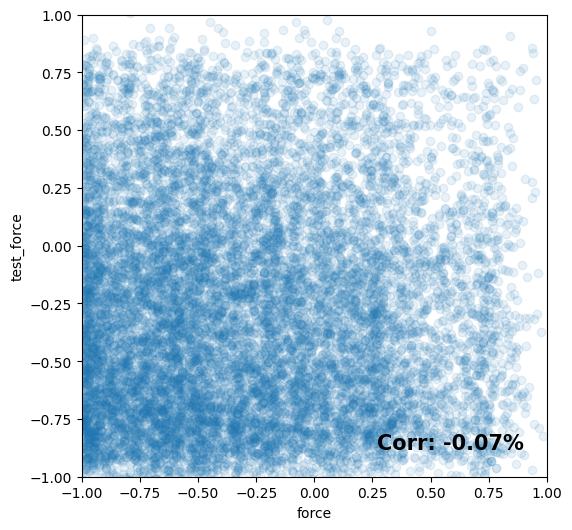

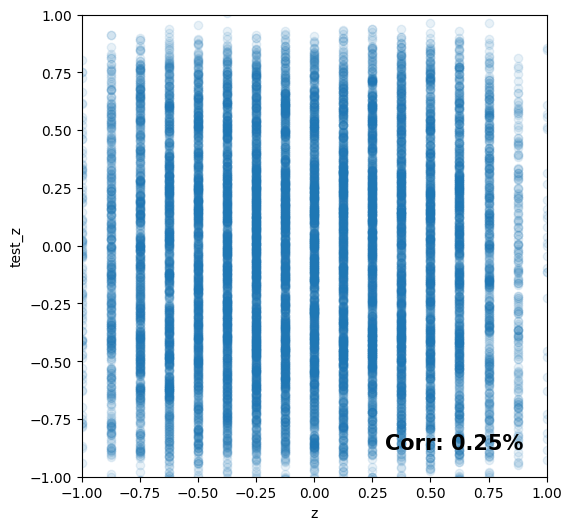

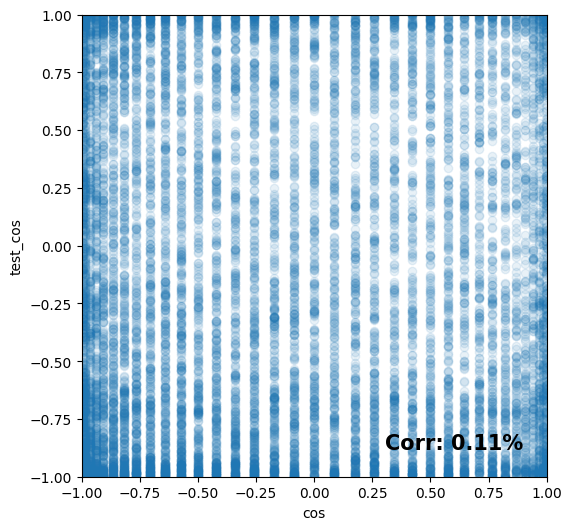

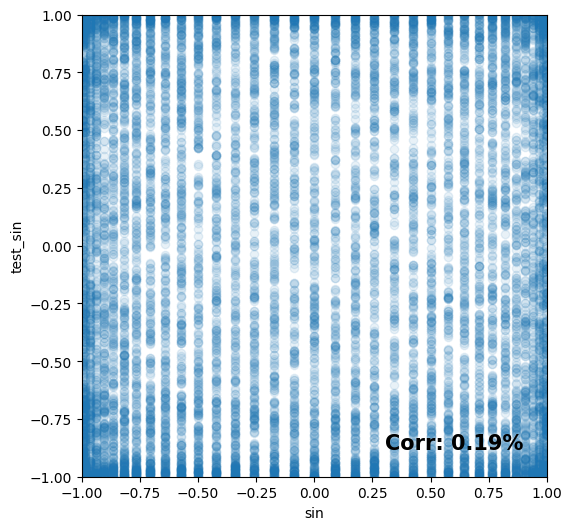

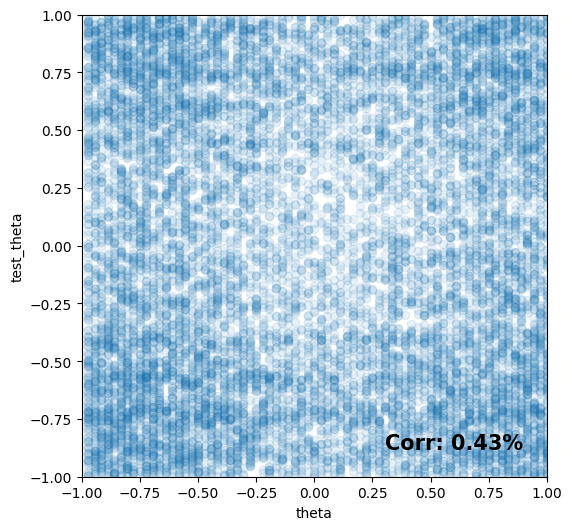

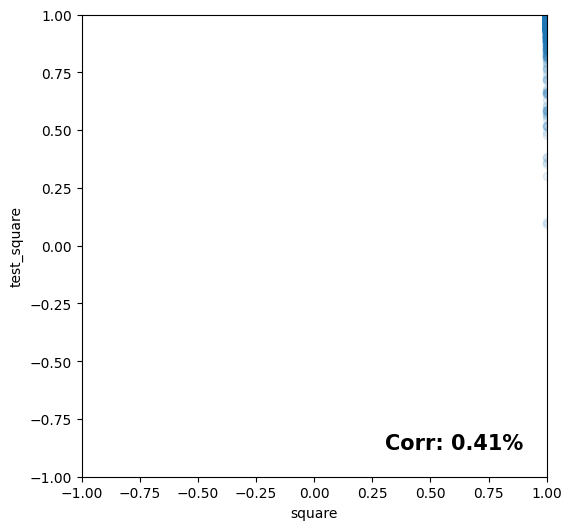

In [96]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta','square']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(testPre[field], testPre[f"test_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"test_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"test_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


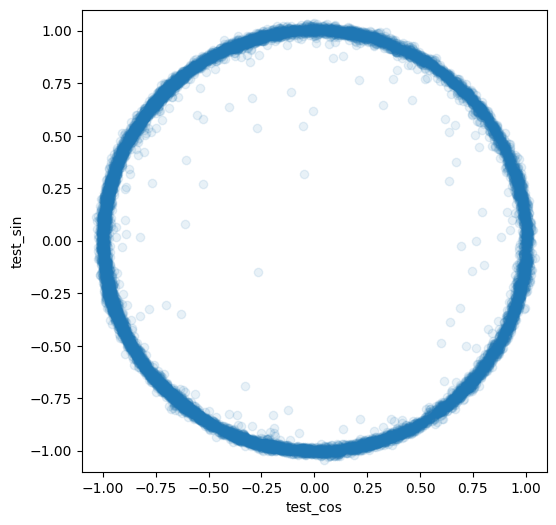

In [97]:
plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
plt.scatter(testPre["test_cos"], testPre["test_sin"], alpha=.1)
plt.xlabel(f"test_cos")
plt.ylabel(f"test_sin")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig(os.path.join(output_dir, f"{dataname}_circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
plt.show()


In [119]:
from tensorflow.keras.models import load_model

model = tf.keras.models.load_model('myModel/'+dataname+'.h5', custom_objects={'custom_loss': custom_loss})
scaler = load(file_name)
valid_predictions = model.predict(X_valid_expanded)
valid_predictions_df=pd.DataFrame(valid_predictions)
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg/180
valid_predictions_df['valid_square'] = valid_predictions_df['valid_cos']**2 + valid_predictions_df['valid_sin']**2
valid_predictions_df.describe()

408/408 [==============================] - 1s 2ms/step


valid_force       valid_z     valid_cos     valid_sin   valid_theta  \
count  13054.000000  13054.000000  13054.000000  13054.000000  13054.000000   
mean      -0.281133     -0.046708     -0.154056     -0.052482     -0.029568   
std        0.468841      0.467978      0.687298      0.708000      0.626122   
min       -1.260452     -1.059789     -1.030303     -1.035326     -0.999802   
25%       -0.674515     -0.421700     -0.799350     -0.750291     -0.606961   
50%       -0.347177     -0.036366     -0.285728     -0.119757     -0.080643   
75%        0.041851      0.315760      0.489456      0.666812      0.574440   
max        0.947176      1.005244      1.020634      1.026991      0.999936   

       valid_square  
count  13054.000000  
mean       1.000055  
std        0.025862  
min        0.192703  
25%        0.989932  
50%        1.001525  
75%        1.012797  
max        1.081424

In [120]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df['square'] = k_df['cos']*k_df['cos'] + k_df['sin']*k_df['sin']
k_df

force      z       cos       sin     theta  square
0     -0.230723 -0.125 -0.342020  0.939693  0.611111     1.0
1      0.015846 -0.500 -0.642788  0.766044  0.722222     1.0
2     -0.554855  0.750 -0.173648 -0.984808 -0.555556     1.0
3      0.295864  0.625 -0.573576  0.819152  0.694444     1.0
4      0.681866 -0.125 -0.173648 -0.984808 -0.555556     1.0
...         ...    ...       ...       ...       ...     ...
13049 -0.639085  0.875 -0.422618 -0.906308 -0.638889     1.0
13050 -0.073474 -0.625  0.087156  0.996195  0.472222     1.0
13051 -0.938009  0.000 -0.866025 -0.500000 -0.833333     1.0
13052  0.695682 -0.250 -0.906308 -0.422618 -0.861111     1.0
13053  0.255325  0.500 -0.422618  0.906308  0.638889     1.0

[13054 rows x 6 columns]

In [121]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)
loss= model.evaluate(X_valid_expanded, y_valid)
print("검증 손실:", loss)
circle_avg = valid_predictions_df['valid_square'].mean()
circle_std = valid_predictions_df['valid_square'].std()
n = 1 # adjust the offset value as needed
print("circle_avg:",round(circle_avg,2),"circle_std:",round(circle_std,2),"      ",round(circle_avg - n*circle_std,2),round(circle_avg + n*circle_std,2))
# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
93.60% force
99.01% z
99.70% cos
99.73% sin
96.48% theta
0.93% square
408/408 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0556
검증 손실: [0.010194722563028336, 0.05563235282897949]
circle_avg: 1.0 circle_std: 0.03        0.97 1.03


valid_force   valid_z valid_cos valid_sin valid_theta valid_square
force     0.935993  0.006716 -0.199113 -0.045463   -0.034494     0.102966
z         0.014111  0.990064  -0.05465  0.032212    0.047593     0.010585
cos      -0.200528 -0.049515  0.996955 -0.015019   -0.001564    -0.143543
sin      -0.041755  0.033966 -0.010136  0.997274    0.777832    -0.004861
theta    -0.018431  0.045617 -0.020832  0.778741    0.964771     0.002389
square    0.004692 -0.008325  -0.05205 -0.014093   -0.065457     0.010687

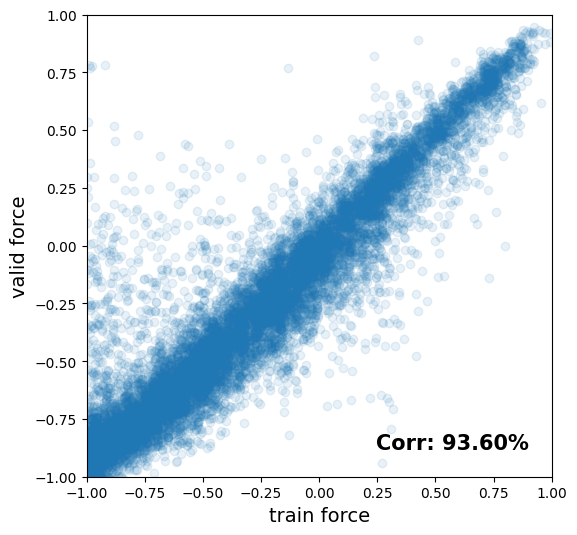

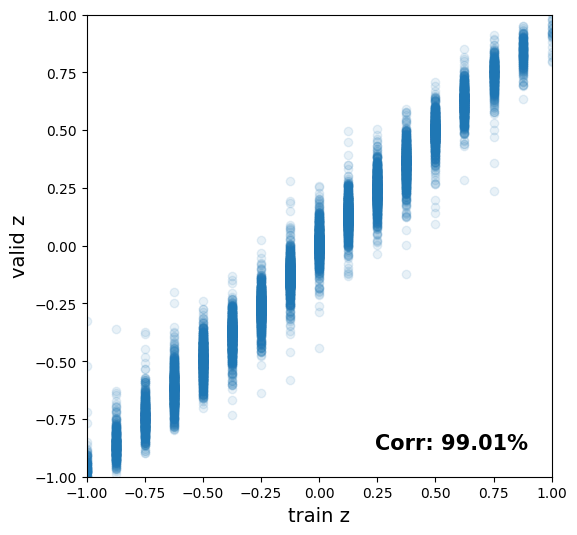

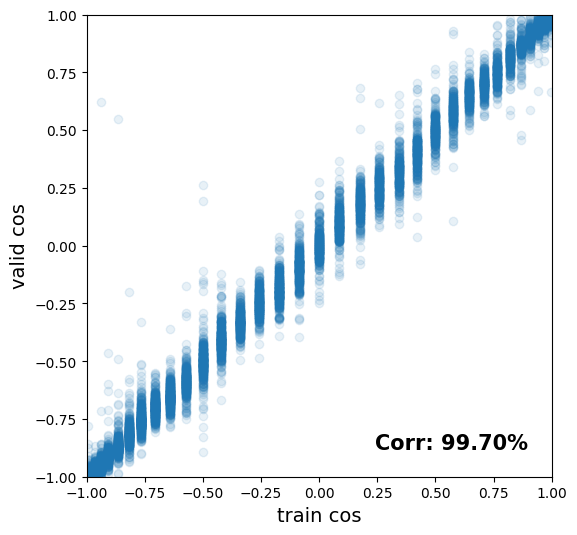

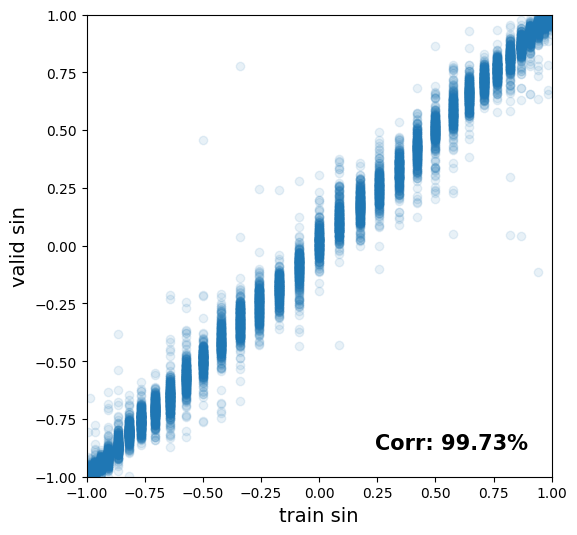

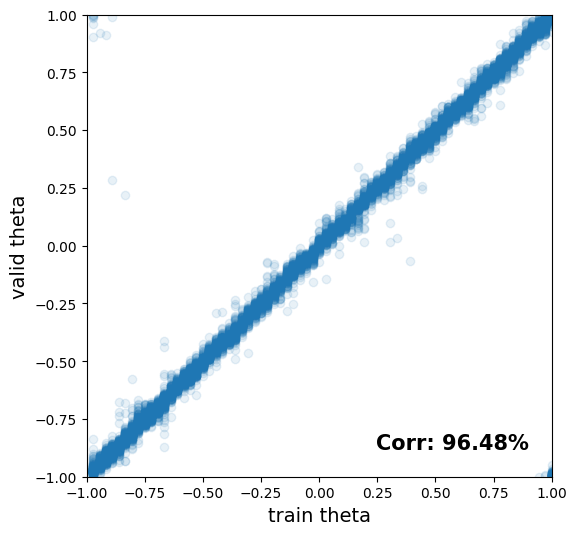

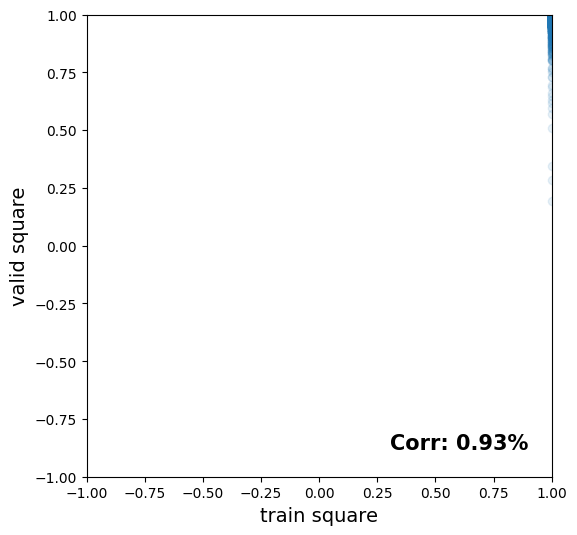

In [125]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta','square']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(f"train {field}", fontsize=14)  # y축 레이블의 글꼴 크기와 무게 설정
    plt.ylabel(f"valid {field}", fontsize=14)  # y축 레이블의 글꼴 크기와 무게 설정
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


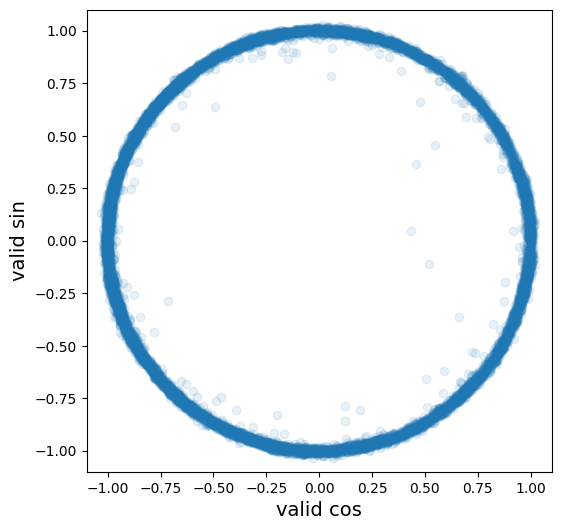

In [126]:
plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
plt.scatter(ValidPre["valid_cos"], ValidPre["valid_sin"], alpha=.1)
plt.xlabel(f"valid cos", fontsize=14)
plt.ylabel(f"valid sin", fontsize=14)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig(os.path.join(output_dir, f"{dataname}_circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
plt.show()

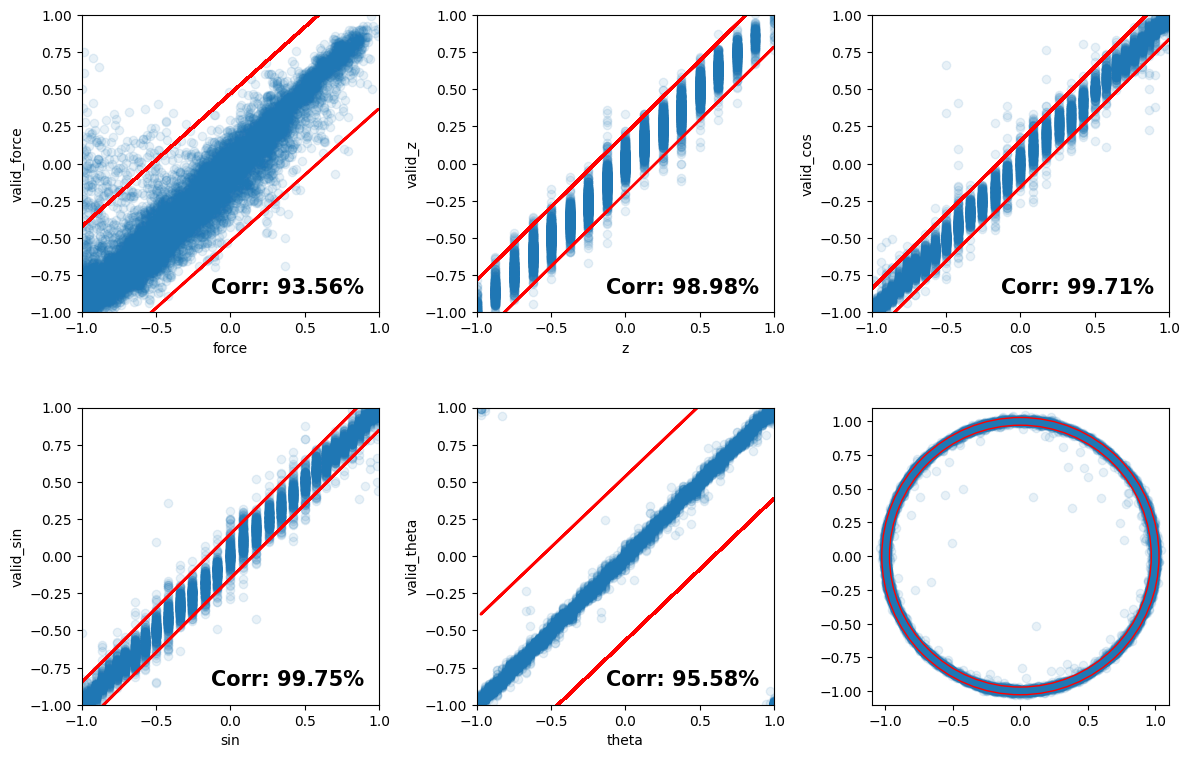

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=0.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = ValidPre[[field]].values.reshape(-1, 1)
        y = ValidPre[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 3 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 3 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(ValidPre["valid_cos"], ValidPre["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_subplot.png"))
plt.show()


In [37]:
import pandas as pd

# 선형 회귀 모델을 사용하여 'force' 필드에 대한 이상치 탐지
field = 'force'
X = ValidPre[[field]].values.reshape(-1, 1)
y = ValidPre[f'valid_{field}'].values
modelLin = LinearRegression()
modelLin.fit(X, y)
y_pred = modelLin.predict(X)

# 잔차 계산
residuals = y - y_pred
std_dev = np.std(residuals)

# 이상치 임계값 설정 (예: 3 * std_dev)
threshold = 3 * std_dev

# 이상치에 해당하는 인덱스 식별
outlier_indices = np.where((residuals > threshold) | (residuals < -threshold))[0]

# ValidPre에서 이상치에 해당하는 모든 데이터 추출
outliers_force = ValidPre.iloc[outlier_indices]

# 추출된 이상치 데이터 확인
outliers_force



force      z       cos       sin     theta  square  valid_force  \
27    -0.733071 -0.125  0.422618 -0.906308 -0.361111     1.0     0.100856   
41    -0.600242 -0.500 -0.939693 -0.342020 -0.888889     1.0     0.011243   
174   -0.888744 -0.750 -0.573576  0.819152  0.694444     1.0    -0.264529   
224   -0.893592  0.250 -0.707107  0.707107  0.750000     1.0     0.031603   
277   -0.617937 -0.500 -0.422618 -0.906308 -0.638889     1.0     0.016211   
...         ...    ...       ...       ...       ...     ...          ...   
12827 -0.893349 -0.625 -0.996195  0.087156  0.972222     1.0    -0.279559   
12932 -0.887835 -0.125 -0.258819 -0.965926 -0.583333     1.0     0.033402   
12960 -0.781245  0.375 -0.642788  0.766044  0.722222     1.0    -0.086610   
12999 -0.884381 -0.125 -0.087156  0.996195  0.527778     1.0    -0.120238   
13051 -0.938009  0.000 -0.866025 -0.500000 -0.833333     1.0     0.053299   

        valid_z  valid_cos  valid_sin  valid_theta  valid_square  
27    -0.062892   0.415895  -0.899122    -0.362093      0.981389  
41    -0.428023  -0.944938  -0.332698    -0.892242      1.003595  
174   -0.745710  -0.618518   0.789457     0.711543      1.005806  
224    0.266298  -0.760640   0.662583     0.771896      1.017590  
277   -0.508515  -0.466067  -0.881740    -0.654777      0.994684  
...         ...        ...        ...          ...           ...  
12827 -0.696229  -0.975895   0.242229     0.922557      1.011046  
12932 -0.147638  -0.267343  -0.960712    -0.586392      0.994440  
12960  0.229164  -0.644686   0.772830     0.721303      1.012886  
12999 -0.089245  -0.107575   0.993684     0.534326      0.998981  
13051 -0.019404  -0.880187  -0.445771    -0.850778      0.973441  

[240 rows x 12 columns]

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def detect_outliers(dataframe, field, std_dev_multiplier=3):
    # 입력 필드에 대한 선형 회귀 모델 피팅
    X = dataframe[[field]].values.reshape(-1, 1)
    y = dataframe[f'valid_{field}'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # 잔차 계산 및 표준편차 기반 임계값 설정
    residuals = y - y_pred
    std_dev = np.std(residuals)
    threshold = std_dev_multiplier * std_dev

    # 이상치 인덱스 식별
    outlier_indices = np.where((residuals > threshold) | (residuals < -threshold))[0]

    # 이상치가 포함된 데이터 추출
    outliers = dataframe.iloc[outlier_indices].copy()  # 복사본 생성

    return outliers


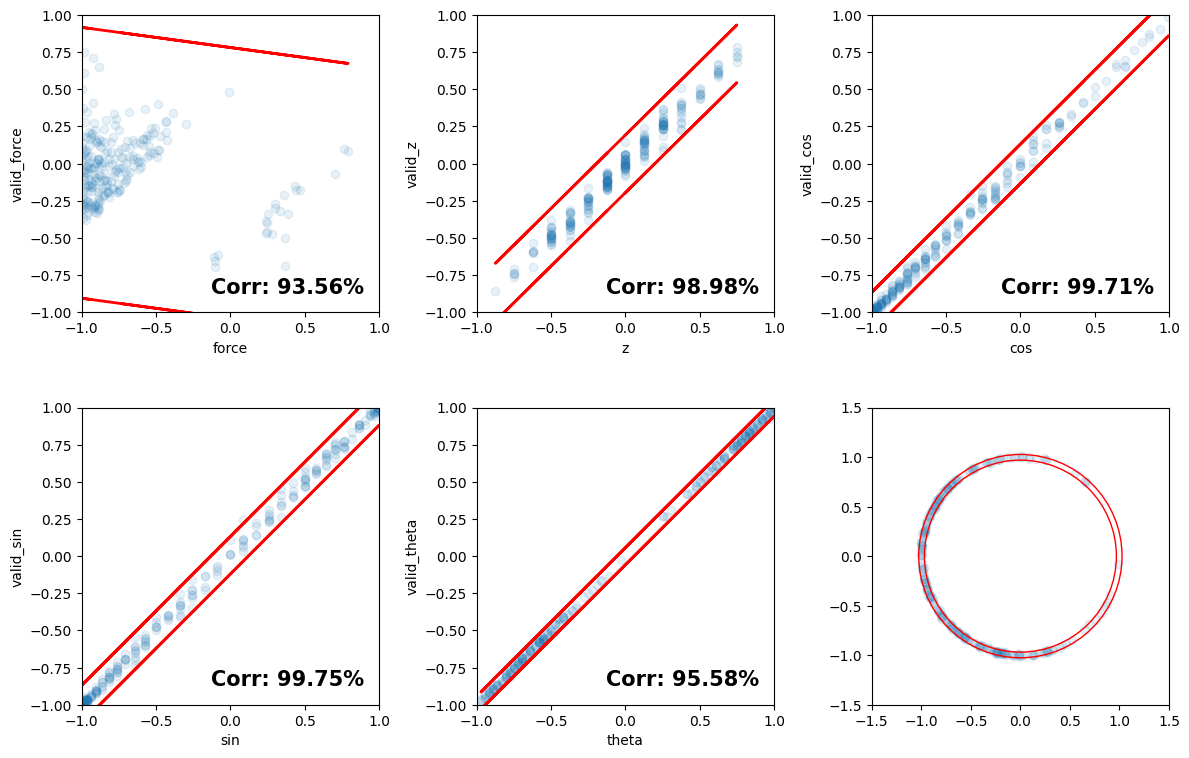

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_force = detect_outliers(ValidPre, 'force')

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_force[field], outliers_force[f"valid_{field}"], alpha=.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_force[[field]].values.reshape(-1, 1)
        y = outliers_force[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 4 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 4 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_force["valid_cos"], outliers_force["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_forceOut.png"))
plt.show()


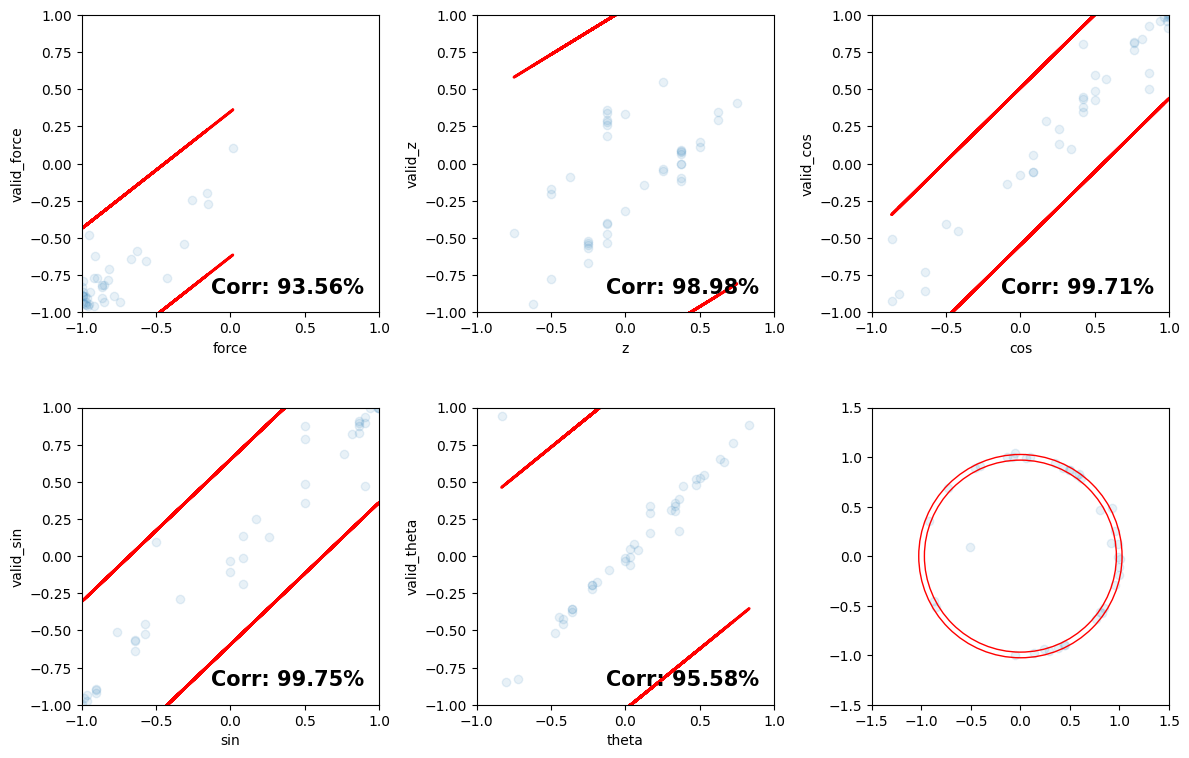

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_z = detect_outliers(ValidPre, 'z',std_dev_multiplier=4)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_z[field], outliers_z[f"valid_{field}"], alpha=.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_z[[field]].values.reshape(-1, 1)
        y = outliers_z[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 4 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 4 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_z["valid_cos"], outliers_z["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_zOut.png"))
plt.show()


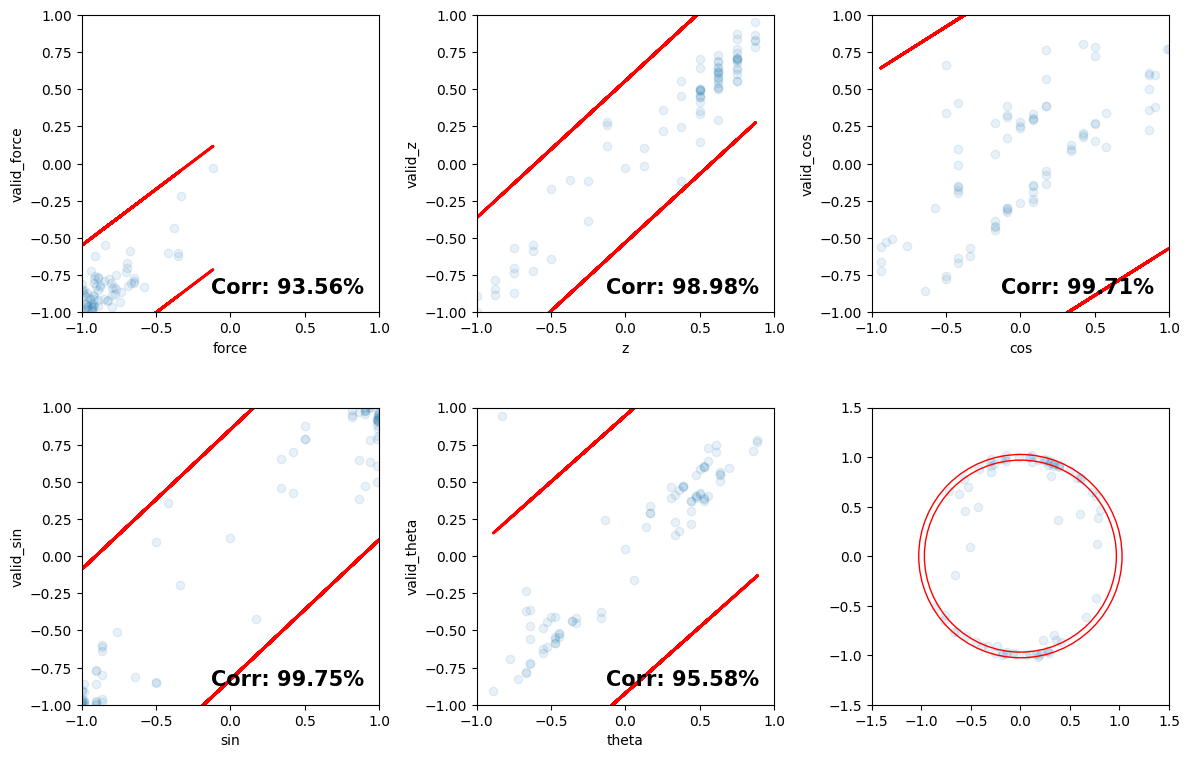

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
alpha=.1
# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_cos = detect_outliers(ValidPre, 'cos',4)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_cos[field], outliers_cos[f"valid_{field}"], alpha=alpha)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_cos[[field]].values.reshape(-1, 1)
        y = outliers_cos[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 4 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 4 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_cos["valid_cos"], outliers_cos["valid_sin"], alpha=alpha)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_cosOut.png"))
plt.show()


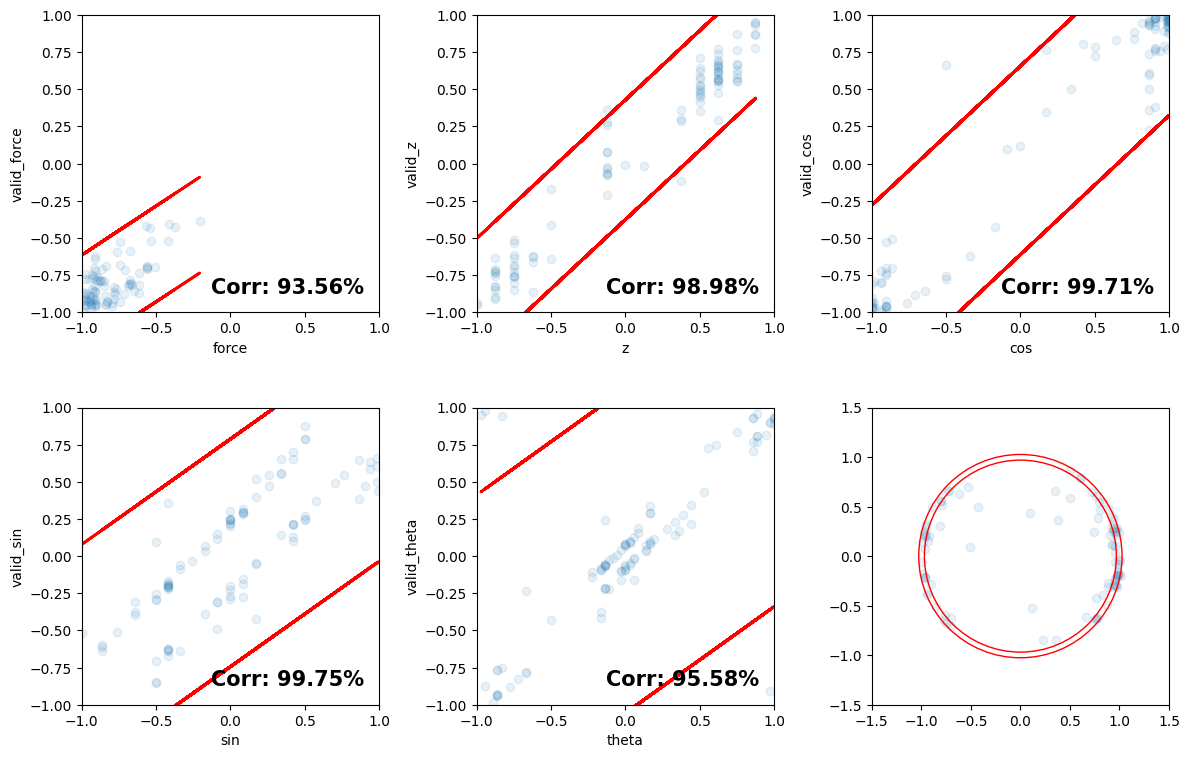

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_sin = detect_outliers(ValidPre, 'sin',4)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_sin[field], outliers_sin[f"valid_{field}"], alpha=alpha)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_sin[[field]].values.reshape(-1, 1)
        y = outliers_sin[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 3 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 3 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_sin["valid_cos"], outliers_sin["valid_sin"], alpha=alpha)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_cosOut.png"))
plt.show()


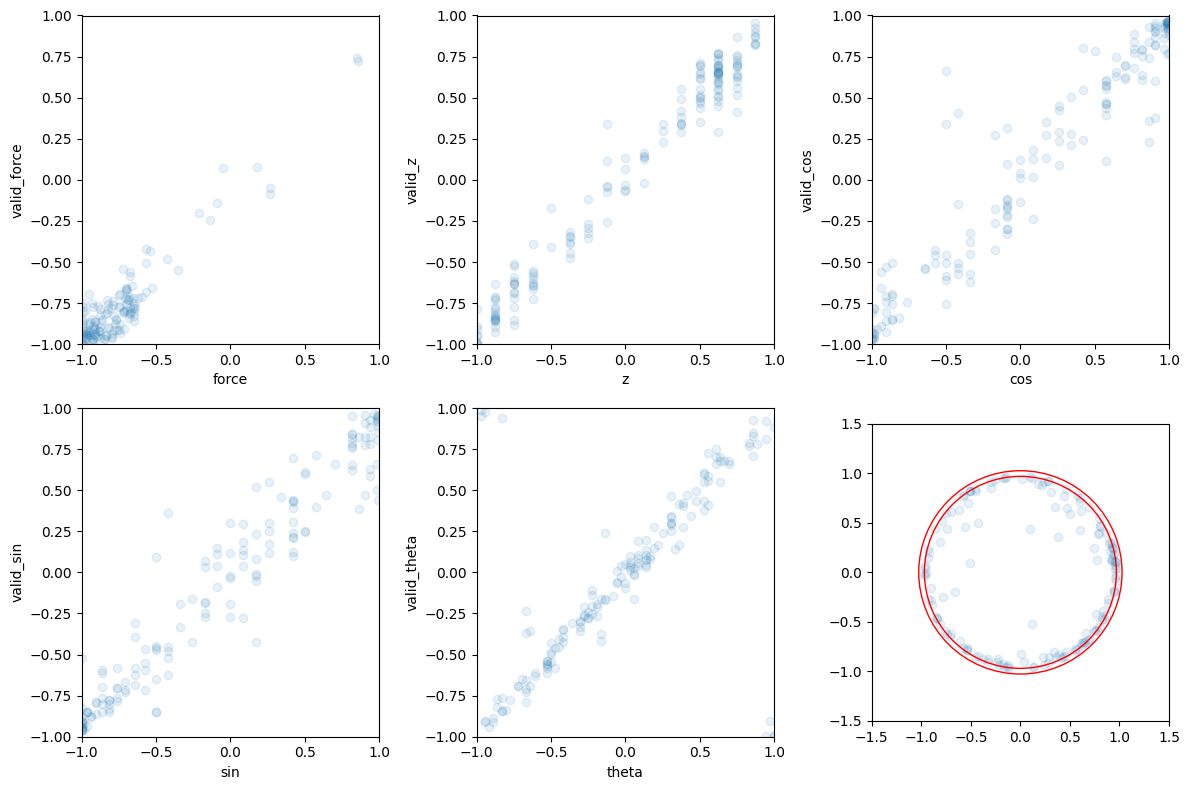

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등

import pandas as pd
import numpy as np

def detect_circle_outliers(dataframe, radius, x_field, y_field):
    """
    데이터 프레임에서 원 내부와 외부에 있는 이상치를 탐지합니다.

    :param dataframe: 분석할 데이터 프레임
    :param radius: 원의 반지름
    :param x_field: x 좌표에 해당하는 필드
    :param y_field: y 좌표에 해당하는 필드
    :return: 원 내부 데이터, 원 외부 데이터 (두 개의 데이터프레임)
    """

    # 원의 방정식을 사용하여 데이터 포인트 필터링
    inside_circle = (dataframe[x_field]**2 + dataframe[y_field]**2 <= radius**2)
    
    # 원 내부와 외부 데이터 분리
    inside_data = dataframe[inside_circle]
    outside_data = dataframe[~inside_circle]

    return inside_data

# 사용 예시
# dataframe = pd.DataFrame(...)  # 데이터셋 정의
# radius = ...  # 반지름 정의
# inside_data, outside_data = detect_circle_outliers(dataframe, radius, 'valid_cos', 'valid_sin')

radius = circle_avg - 1 * circle_std
outliers_circle = detect_circle_outliers(ValidPre,radius,"valid_cos","valid_sin")


fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성


# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_circle["valid_cos"], outliers_circle["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_circle[field], outliers_circle[f"valid_{field}"], alpha=0.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)




plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_circle.png"))
plt.show()

In [44]:
outliers_circle

force      z       cos       sin     theta  square  valid_force  \
77    -0.896561  0.625  0.984808 -0.173648 -0.055556     1.0    -0.950749   
115   -0.982306  0.000  0.984808  0.173648  0.055556     1.0    -1.035077   
298   -0.674655  0.625  0.984808  0.173648  0.055556     1.0    -0.587075   
313   -0.681503 -0.750 -0.087156 -0.996195 -0.527778     1.0    -0.840544   
318   -0.739918 -1.000  0.087156 -0.996195 -0.472222     1.0    -0.768405   
...         ...    ...       ...       ...       ...     ...          ...   
12868 -0.568308  0.500  0.906308 -0.422618 -0.138889     1.0    -0.680596   
12873 -0.932434 -0.875 -0.996195  0.087156  0.972222     1.0    -0.747312   
12948 -0.620603 -0.625  0.906308  0.422618  0.138889     1.0    -0.718076   
12966 -0.880624  0.500 -0.087156 -0.996195 -0.527778     1.0    -0.819518   
12983 -0.651810 -1.000 -0.906308 -0.422618 -0.861111     1.0    -0.858970   

        valid_z  valid_cos  valid_sin  valid_theta  valid_square  
77     0.552827   0.953911   0.032333     0.010785      0.910992  
115    0.063742   0.967236  -0.023038    -0.007580      0.936077  
298    0.681518   0.768146  -0.422109    -0.159942      0.768224  
313   -0.685782  -0.121965  -0.937878    -0.541163      0.894490  
318   -0.785961   0.129717  -0.959727    -0.457236      0.937901  
...         ...        ...        ...          ...           ...  
12868  0.615087   0.823441  -0.478069    -0.167435      0.906606  
12873 -0.721757  -0.905049  -0.277674    -0.905243      0.896217  
12948 -0.637921   0.899834   0.304444     0.103847      0.902387  
12966  0.496802  -0.327748  -0.903764    -0.610739      0.924207  
12983 -0.950243  -0.703609  -0.624450    -0.768950      0.885003  

[157 rows x 12 columns]

1632/1632 [==============================] - 4s 2ms/step
진행 상태: 100.00%

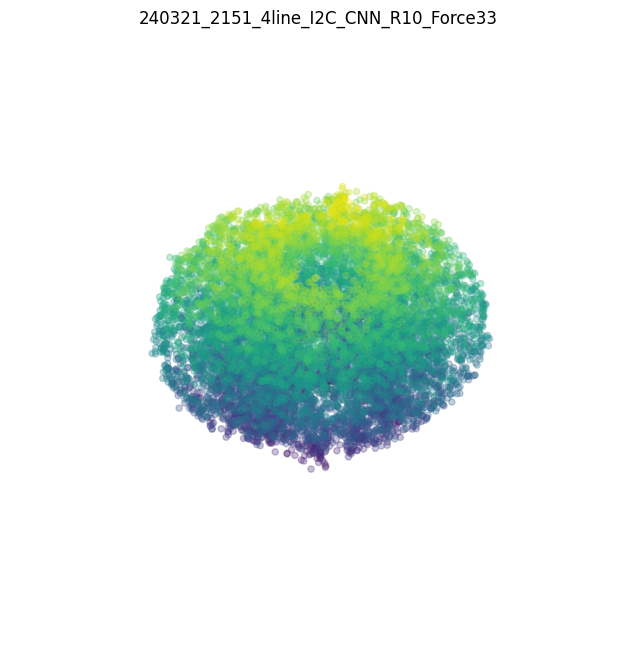

In [45]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

from tensorflow.keras.models import load_model

model = tf.keras.models.load_model('myModel/'+dataname+'.h5', custom_objects={'custom_loss': custom_loss})
scaler = load(file_name)
valid_predictions = model.predict(X_train_expanded)
valid_predictions_df=pd.DataFrame(valid_predictions)
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df['valid_square'] = valid_predictions_df['valid_cos']**2 + valid_predictions_df['valid_sin']**2
valid_predictions_df.describe()




cmap = plt.cm.viridis
norm_z = (ValidPre['valid_z'] - ValidPre['valid_z'].min()) / (ValidPre['valid_z'].max() - ValidPre['valid_z'].min())
colors = cmap(norm_z)


# 최소값과 최대값
min_value = min_max_F[0]
max_value = min_max_F[1]

# 원래 값으로 변환
Force = ((ValidPre['valid_force']/2+0.5) * (max_value - min_value)) + min_value
cos = Force*ValidPre['valid_cos']
sin =  Force*ValidPre['valid_sin']
z = ((ValidPre['valid_z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0] 

ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)

ax.grid(False)  # 격자 숨김
ax.set_xticks([])  # X축 눈금 숨김
ax.set_yticks([])  # Y축 눈금 숨김
ax.set_zticks([])  # Z축 눈금 숨김
ax.set_axis_off()  # 축 자체를 숨김
 

# 애니메이션 생성 및 저장
nSteps = 5
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_valid_force_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()


진행 상태: 100.00%

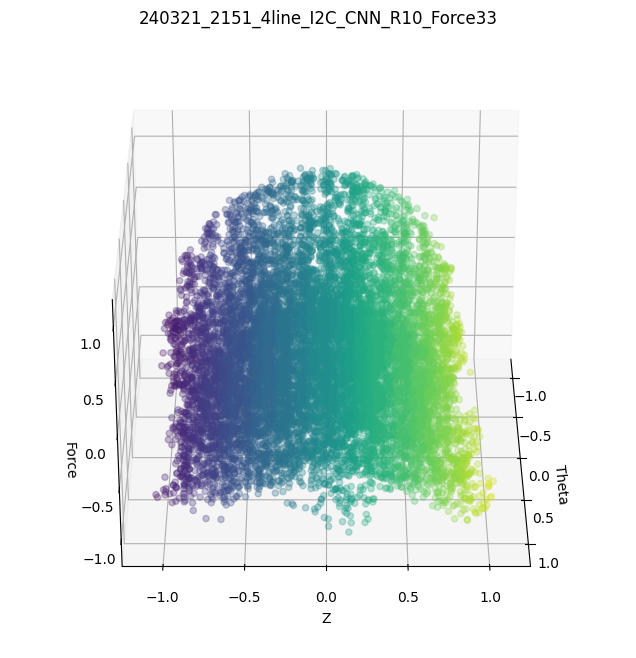

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()
    
    
# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

z_bins = np.arange(-1.2, 1.2, 0.05)

z_indices = np.digitize(ValidPre['valid_z'], z_bins)

# 색상 맵 설정
colors = plt.cm.viridis(np.linspace(0, 1, len(z_bins)))

# 3D 스캐터 플롯 생성
# 각 점에 색상 배열을 적용하기 위해 z_indices-1을 사용
for i in range(1, len(z_bins)):
    subset = ValidPre[z_indices == i]
    ax.scatter(subset['valid_theta'], subset['valid_z'], subset['valid_force'], color=colors[i-1], alpha=0.3)

# 축 레이블 설정
ax.set_xlabel('Theta')
ax.set_ylabel('Z')
ax.set_zlabel('Force')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_title(dataname)


nSteps = 90
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)
# GIF 애니메이션 생성
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)

# GIF 저장
ani.save(os.path.join(output_dir, f"{dataname}_Ref_plane.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))


In [47]:
import pandas as pd
from sklearn.cross_decomposition import CCA

# 가정: 'ValidPre' 데이터프레임은 이미 로드되어 있고, 필요한 모든 원시 데이터를 포함하고 있음

# Force, cos, sin, z 값 계산 - 첫 번째 데이터 세트
Force1 = ((ValidPre['valid_force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos1 = Force1 * ValidPre['valid_cos']
sin1 = Force1 * ValidPre['valid_sin']
z1 = ((ValidPre['valid_z']/2 + 0.5) * (152 - 8)) + 8

# Force, cos, sin, z 값 계산 - 두 번째 데이터 세트
Force2 = ((ValidPre['force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos2 = Force2 * ValidPre['cos']
sin2 = Force2 * ValidPre['sin']
z2 = ((ValidPre['z']/2 + 0.5) * (152 - 8)) + 8

# 데이터프레임 생성
df1 = pd.DataFrame({'ForceCos': Force1*cos1, 'ForceSin': Force1*sin1, 'Z': z1})
df2 = pd.DataFrame({'ForceCos': Force2*cos2, 'ForceSin': Force2*sin2, 'Z': z2})

# 캐노니컬 상관 분석 (CCA) 수행
# CCA 인스턴스 생성, 여기서 n_components는 분석할 컴포넌트 수, 두 데이터 세트의 변수 수에 맞게 설정
cca = CCA(n_components=min(df1.shape[1], df2.shape[1]))

# CCA 적합
cca.fit(df1, df2)

# 결과 변환
df1_c, df2_c = cca.transform(df1, df2)

# CCA 결과 출력
print("Canonical Correlation per component:")
for i, (cc1, cc2) in enumerate(zip(df1_c.T, df2_c.T), start=1):
    corr = np.corrcoef(cc1, cc2)[0, 1]
    print(f"Component {i}: {corr:.3f}")


Canonical Correlation per component:
Component 1: 0.997
Component 2: 0.998
Component 3: 0.990


진행 상태: 100.00%

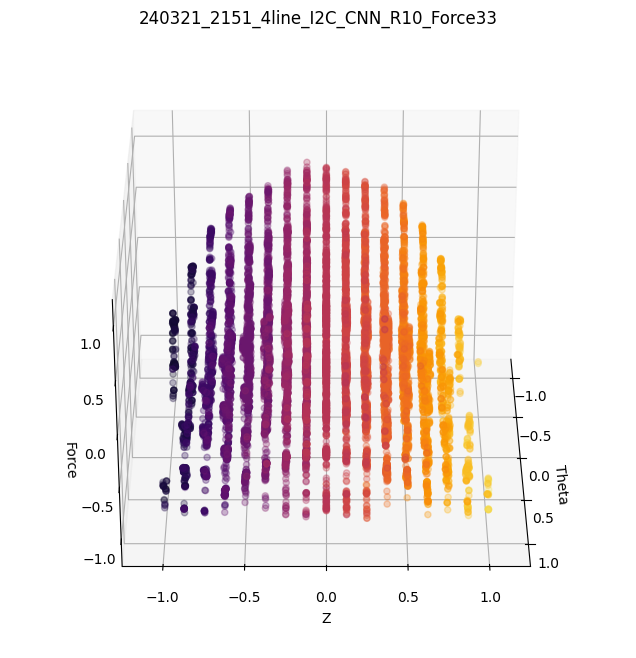

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()
    
# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

z_bins = np.arange(-1.2, 1.2, 0.05)

z_indices = np.digitize(ValidPre['valid_z'], z_bins)

# 색상 맵 설정
colors = plt.cm.inferno(np.linspace(0, 1, len(z_bins)))

# 3D 스캐터 플롯 생성
# 각 점에 색상 배열을 적용하기 위해 z_indices-1을 사용
for i in range(1, len(z_bins)):
    subset = ValidPre[z_indices == i]
    ax.scatter(subset['theta'], subset['z'], subset['force'], color=colors[i-1], alpha=0.3)

# 축 레이블 설정
ax.set_xlabel('Theta')
ax.set_ylabel('Z')
ax.set_zlabel('Force')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_title(dataname)


nSteps = 90
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)
# GIF 애니메이션 생성
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)

# GIF 저장
ani.save(os.path.join(output_dir, f"{dataname}_Ref.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))


진행 상태: 100.00%

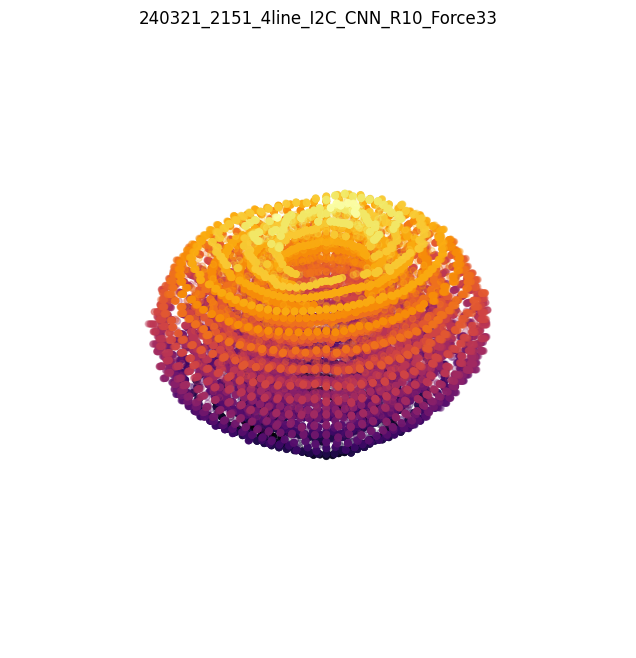

In [49]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# 'Inferno' 색상 맵 적용
cmap = plt.cm.inferno


# z 값을 0과 1 사이로 정규화
norm_z = (y_train['z'] - y_train['z'].min()) / (y_train['z'].max() - y_train['z'].min())

# 색상 맵 적용
colors = cmap(norm_z)


# 최소값과 최대값
min_value = min_max_F[0]
max_value = min_max_F[1]

# 원래 값으로 변환
Force = ((y_train['Force']/2+0.5) * (max_value - min_value)) + min_value
cos = Force*y_train['cos']
sin =  Force*y_train['sin']
z = ((y_train['z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0] 


ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)

ax.grid(False)  # 격자 숨김
ax.set_xticks([])  # X축 눈금 숨김
ax.set_yticks([])  # Y축 눈금 숨김
ax.set_zticks([])  # Z축 눈금 숨김
ax.set_axis_off()  # 축 자체를 숨김

 

# 애니메이션 생성 및 저장
nSteps = 5
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_train_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()


In [50]:
output_dir

'myLearningData/savefig/4line/LargeData/fine'

In [51]:
import os
import pandas as pd



# fmax의 0.4 이상인 데이터만 필터링
filtered_ValidPre = ValidPre[ValidPre['valid_force'] >= -0.2]
filtered_ValidPre = ValidPre[ValidPre['valid_z'] >= -1]
filtered_ValidPre = ValidPre[ValidPre['valid_z'] <= 1]
filtered_ValidPre = ValidPre[(ValidPre['valid_cos'])**2 + (ValidPre['valid_sin'])**2 >= 0.97]


# 필터링된 데이터를 기준으로 색상 및 값 재계산
norm_z_filtered = (filtered_ValidPre['valid_z'] - filtered_ValidPre['valid_z'].min()) / (filtered_ValidPre['valid_z'].max() - filtered_ValidPre['valid_z'].min())
colors_filtered = cmap(norm_z_filtered)

# 원래 값으로 변환된 힘을 기준으로 cos, sin, z 값을 재계산
Force_filtered = ((filtered_ValidPre['valid_force']/2+0.5) * (max_value - min_value)) + min_value
cos_filtered = Force_filtered * filtered_ValidPre['valid_cos']
sin_filtered = Force_filtered * filtered_ValidPre['valid_sin']
z_filtered = ((filtered_ValidPre['valid_z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0]

# 필터링된 데이터를 사용하여 그래프 다시 그리기
ax.clear()  # 이전에 그려진 그래프를 클리어
ax.scatter(cos_filtered, sin_filtered, z_filtered, c=colors_filtered, alpha=0.3)

# 축 레이블 및 한계 설정 (위와 동일)
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_axis_off()

# 변경된 그래프를 기반으로 애니메이션 다시 생성 및 저장
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"_{dataname}_3d_scatter_valid_filtered_color.gif"), dpi=200, writer='pillow', progress_callback=lambda i, n: update_progress(i, lenFrames))

# 변경된 그래프 확인
plt.show()


진행 상태: 100.00%

In [52]:
ValidPre['valid_force'].min()

-1.3343825

In [53]:
ValidPre['valid_force'].max()

0.9906039

In [54]:
y_train

Force      z       cos       sin
29488   0.370459 -0.625 -0.819152  0.573576
38187  -0.752825 -0.500 -0.866025  0.500000
108389 -0.757431  0.500 -0.965926 -0.258819
125235 -0.271747  0.750 -0.996195  0.087156
48414  -0.030086 -0.375 -0.819152 -0.573576
...          ...    ...       ...       ...
125008  0.222300  0.750 -0.965926  0.258819
78547  -0.260415  0.125  0.866025  0.500000
9935   -0.690289 -0.875  0.642788  0.766044
43049   0.048993 -0.500  0.984808 -0.173648
109723 -0.380336  0.500 -0.342020 -0.939693

[52215 rows x 4 columns]